<a href="https://colab.research.google.com/github/GeraldRyan/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [ ]:
##Practice Code   

In [2]:
import numpy as np

In [3]:
mean = 0
sigma = 1

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn-bright')
sample = np.random.normal(loc=mean, scale=sigma, size=1000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


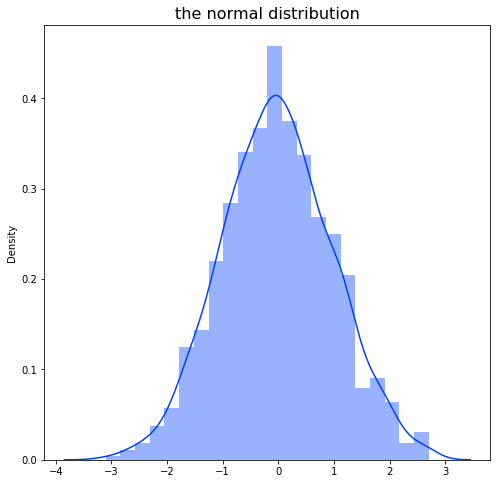

In [6]:
fix, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(sample)
ax.set_title('the normal distribution', fontsize=16)
fix.savefig("NormalDistribution.png", transparent=False, dpi=150)
fix.savefig("NormalDistributionTransparent.png", transparent=True, dpi=150)


In [7]:
##More practice Code
#Create T distributions
t_df10 = np.random.standard_t(df=10, size=100)
t_df100 = np.random.standard_t(df=100, size=1000)
t_df1000 = np.random.standard_t(df=1000, size=10000)

#Create normal distribution
s = np.random.normal(size=10000)




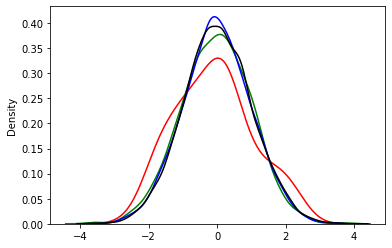

In [8]:
#create the figures and axes and plots
ax = sns.kdeplot(t_df10, color='r')
ax = sns.kdeplot(t_df100, color='g')
ax = sns.kdeplot(t_df1000, color='b')
ax = sns.kdeplot(s, color='k');

In [9]:
## More training
from scipy import stats
import numpy as np
## generate random test scores
rvs = stats.norm.rvs(loc=69, scale=6.5, size=50,random_state=42)

#display scores as check
rvs

#check sample mean and std
print("the mean of the sample is", rvs.mean())
print("the standard deviation of the sample is", rvs.std())

# Calculate t value using ttest__1samp
stats.ttest_1samp(rvs, popmean=72)

the mean of the sample is 67.53441961583509
the standard deviation of the sample is 6.00785209617076


Ttest_1sampResult(statistic=-5.2030346601039055, pvalue=3.841987344207577e-06)

In [10]:
#calculate t-value
tstatistic = ((rvs.mean() - 72)/(rvs.std()/np.sqrt(rvs.size)))
print("The t statistic is ", tstatistic)

The t statistic is  -5.255858701297306


In [11]:
from google.colab import files
uploaded = files.upload()

Saving names.csv to names.csv


In [16]:
### YOUR CODE STARTS HERE
import pandas as pd
import io

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
columns = list(pd.read_csv(io.BytesIO(uploaded["names.csv"])))
#scrub white space
for i in range(len(columns)):
  columns[i] = columns[i][1:]

df = pd.read_csv(url, names=columns)

df.head()


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [17]:
# 16 issues, between columns 2:17. Can pick random or whatever. 
#TODO 
# Group by Repub/Democrat
grouped_by = df.groupby("Class Name").apply(lambda g: g["education-spending"].value_counts())
pivot_table = pd.pivot_table(df, index="Class Name", columns=["immigration"], aggfunc="count")
# pivot = df.pivot(index="Class Name", columns="immigration")
# grouped_by.head() 
pivot_table.head()
  
  ##ABORT TRYING TO MAKE A PIVOT TABLE

adoption-of-the-budget-resolution       ... water-project-cost-sharing     
immigration                                 ?    n  ...                          n    y
Class Name                                          ...                                
democrat                                    4  139  ...                        139  124
republican                                  3   73  ...                         73   92

[2 rows x 45 columns]

In [18]:
#Make getter function
def get_votes(dataframe, party: str, issue: str, stance: str ):
  party_df = dataframe.loc[dataframe["Class Name"]==party]
  roll = party_df.loc[party_df[issue] ==stance]
  
  return len(roll[issue].tolist())

get_votes(df, "democrat", "education-spending", "n") # Works


#Get votes on specific issue by party - e.g. immigration
republican_yes_immigration = get_votes(df, "republican", "immigration", "y")
democrat_yes_immigration = get_votes(df, "democrat", "immigration", "y")
republican_yes_immigration


92

In [ ]:
#Make issue details getter function
def get_details(dataframe, issue):
  details = {}
  details["yes"] = 0
  details["no"] = 0
  details["total"] = len(dataframe["Class Name"].tolist())
  for s in set(dataframe["Class Name"].tolist()):
    party_df = dataframe.loc[dataframe["Class Name"] == s]
    vote_list = party_df[issue].tolist()
    vote_roll = party_df[issue].replace(['n', 'y','?'], [0,1, None]).tolist()
    details[s] = {"y": vote_list.count("y"), "n": vote_list.count("n"), "?":vote_list.count("?"), "total":len(vote_list)}
    details["yes"] += details[s]['y']
    details["no"] += details[s]['n']
    details[s]['roll'] = vote_roll # roll is an array of 1 and 0 that can be run wtih Numpy
    details[s]['party_mean'] = np.nanmean(details[s]['roll'])
    details[s]['party_std'] = np.nanstd(details[s]['roll'])

  details["allgemeines_mean"] = details["yes"] / details["total"]
  for s in set(dataframe["Class Name"].tolist()): # now we have totals and mean let's go for standard deviation by party

    

  return details

get_details(df, 'immigration') 

In [ ]:
def get_details_all(df):
  all_details = {}
  for c in df.columns.tolist():
    if c == "Class Name":
      continue
    all_details[c] = get_details(df, c)
  return all_details


all_vote_details = get_details_all(df)
all_vote_details

In [51]:
# run t test 
def run_t_test(obj, issue):
  mean_r = obj[issue]['republican']["party_mean"]
  mean_d = obj[issue]['democrat']["party_mean"]
  std_r = obj[issue]['republican']["party_std"]
  std_d = obj[issue]['democrat']["party_std"]
  pop_r = obj[issue]['republican']["total"]
  pop_d = obj[issue]['democrat']["total"]
  numerator = mean_r - mean_d
  left_term = (std_r**2/pop_r)
  right_term = (std_d**2/pop_d)
  denominator = (left_term + right_term)**.5
  t = numerator / denominator


from scipy import stats

run_t_test(all_vote_details, 'religious-groups-in-schools')

# use scipy to do the lifting

def use_scipy(obj, issue):
  a = obj[issue]['republican']['roll']
  b = obj[issue]['democrat']['roll']
  return [a,b]



[a,b] = use_scipy(all_vote_details, 'water-project-cost-sharing')
stats.ttest_ind(a, b, nan_policy="omit")

# statistic is t statistic; pvalue is the same. For immigration it is above .01
# That means that there can be overlap. That means they do not disagree partisanly

# Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)

# Gosh for education-spending the p value is 1.8 e -64 so almost nothing. that can't be right. Or maybe it can. 
# physician-fee-freeze is extreme partisan at e -77
# water-project-cost-sharing is almost p value of 100, at .929 votes are all within 1 and 2 of equal 

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

In [ ]:
# That's it I think. Let the code do the heavy lifting. Just know how to run it. It just takes two arrays and it computes the mean and median and all that.